In [1]:
import pickle

# Pfad zur gespeicherten .pkl-Datei
filename = "data/pickle/processed_documents.pkl"

# Laden der Liste aus der .pkl-Datei
with open(filename, "rb") as file:
    processed_documents = pickle.load(file)

# Ausgabe der ersten Einträge, um zu überprüfen, dass das Laden erfolgreich war
for i, doc in enumerate(processed_documents):
    print(f"Document {i}:\n")
    for token_info in doc:
        print(token_info)
    print("\n" + "="*50 + "\n")

# Optional: Begrenze die Ausgabe auf die ersten 5 Dokumente, wenn es viele sind
    if i >= 4:
        break

Document 0:

('batterien', 'NOUN', 'batterien')
('akkumulatoren', 'NOUN', 'Akkumulator')
('gehören', 'VERB', 'gehören')
('nicht', 'PART', 'nicht')
('brände', 'ADJ', 'bränd')
('auslösen', 'VERB', 'auslösen')
('umweltgefährdende', 'ADJ', 'umweltgefährdend')
('stoffe', 'NOUN', 'Stoff')
('enthalten', 'ADJ', 'enthalt')
('mensch', 'NOUN', 'Mensch')
('umwelt', 'NOUN', 'Umwelt')
('belasten', 'VERB', 'belasten')
('ressourcen', 'NOUN', 'Ressource')
('rohstoffe', 'NOUN', 'Rohstoff')
('sammelboxen', 'VERB', 'sammelboxen')
('handel', 'NOUN', 'Handel')
('batterien', 'NOUN', 'batterien')
('verkauft', 'VERB', 'verkaufen')
('supermärkte', 'ADJ', 'supermärkt')
('drogeriemärkte', 'NOUN', 'drogeriemärkte')
('warenhäuser', 'ADJ', 'Warenhäuser')
('baumärkte', 'NOUN', 'baumärkte')
('tankstellen', 'VERB', 'Tankstelle')
('einpacktische', 'ADJ', 'einpacktisch')
('kommunale', 'ADJ', 'kommunal')
('sammelstellen', 'NOUN', 'Sammelstellen')
('wertstoffhöfe', 'NOUN', 'Wertstoffhof')
('schadstoffmobile', 'NOUN', 'Scha

In [ ]:
for i, doc in enumerate(processed_documents):
    print(f"Document {i}:\n")
    print(doc)
    print("\n" + "="*50 + "\n")

In [ ]:
print(processed_documents[9])


In [2]:
def split_into_chunks_with_metadata_v3(processed_doc, max_chunk_size=100, overlap_size=20):
    chunks = []
    current_chunk = []
    current_metadata = {'tokens': [], 'lemmas': [], 'pos_tags': []}
    current_length = 0
    
    for token_info in processed_doc:
        token, pos, lemma = token_info
        token_length = len(token.split())

        if current_length + token_length > max_chunk_size:
            if current_length > 0:
                chunks.append({
                    'text': " ".join([tok[0] for tok in current_chunk]),
                    'metadata': current_metadata
                })
            # Reset the chunk, keeping overlap
            current_chunk = current_chunk[-overlap_size:]
            current_metadata = {
                'tokens': current_metadata['tokens'][-overlap_size:],
                'lemmas': current_metadata['lemmas'][-overlap_size:],
                'pos_tags': current_metadata['pos_tags'][-overlap_size:]
            }
            current_length = sum(len(tok.split()) for tok in current_metadata['tokens'])
        
        current_chunk.append(token_info)
        current_metadata['tokens'].append(token)
        current_metadata['lemmas'].append(lemma)
        current_metadata['pos_tags'].append(pos)
        current_length += token_length
    
    if current_chunk:
        chunks.append({
            'text': " ".join([tok[0] for tok in current_chunk]),
            'metadata': current_metadata
        })

    return chunks

# Liste, die alle Chunks aus allen Dokumenten enthält
all_chunks = []

# Anwenden der Funktion auf alle Dokumente in der Liste
for i, processed_doc in enumerate(processed_documents):
    chunks = split_into_chunks_with_metadata_v3(processed_doc, max_chunk_size=150, overlap_size=50)
    all_chunks.extend(chunks)  # Alle Chunks zur Hauptliste hinzufügen
    
    # Ausgabe der ersten paar Chunks des aktuellen Dokuments zur Überprüfung
    print(f"Document {i} Chunks:")
    for j, chunk in enumerate(chunks[:5]):
        print(f"Chunk {j+1} Text:\n{chunk['text']}\n")
        print(f"Chunk {j+1} Metadata:\n{chunk['metadata']}\n")
        print("="*50)
    print("\n" + "="*100 + "\n")

Document 0 Chunks:
Chunk 1 Text:
batterien akkumulatoren gehören nicht brände auslösen umweltgefährdende stoffe enthalten mensch umwelt belasten ressourcen rohstoffe sammelboxen handel batterien verkauft supermärkte drogeriemärkte warenhäuser baumärkte tankstellen einpacktische kommunale sammelstellen wertstoffhöfe schadstoffmobile freiwillige sammelstellen unternehmen behörden hochschulen nicht batterien elektrogeräten entsorgung entnehmen batteriesammlung geben

Chunk 1 Metadata:
{'tokens': ['batterien', 'akkumulatoren', 'gehören', 'nicht', 'brände', 'auslösen', 'umweltgefährdende', 'stoffe', 'enthalten', 'mensch', 'umwelt', 'belasten', 'ressourcen', 'rohstoffe', 'sammelboxen', 'handel', 'batterien', 'verkauft', 'supermärkte', 'drogeriemärkte', 'warenhäuser', 'baumärkte', 'tankstellen', 'einpacktische', 'kommunale', 'sammelstellen', 'wertstoffhöfe', 'schadstoffmobile', 'freiwillige', 'sammelstellen', 'unternehmen', 'behörden', 'hochschulen', 'nicht', 'batterien', 'elektrogeräten', 'e

In [ ]:
import pickle
import os

def save_chunks_to_pickle(chunks, filename="data/pickle/old_chunks.pkl"):
    # Sicherstellen, dass der Ordner "data/pickle" existiert
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    
    # Speichern der Chunks in der angegebenen Datei
    with open(filename, "wb") as file:
        pickle.dump(chunks, file)
    
    print(f"Die Chunks wurden erfolgreich in '{filename}' gespeichert.")

# Beispielnutzung:
save_chunks_to_pickle(all_chunks, filename="data/pickle/old_chunks.pkl")

In [ ]:
from transformers import pipeline
import spacy

# Lade das Modell zur thematischen Klassifizierung
classifier = pipeline("zero-shot-classification", model="distilbert-base-uncased")

# Lade das Spacy-Modell für die Tokenisierung und POS-Tagging
nlp = spacy.load("de_core_news_sm")

def segment_and_tag_chunk(chunk):
    """
    Segment and tag the chunk into smaller, thematically relevant pieces.
    Args:
    - chunk (str): The text chunk to be segmented and tagged.

    Returns:
    - segmented_chunks (dict): A dictionary with tokens, POS tags, and themes.
    """
    candidate_labels = ["Materialien", "Tonnenarten", "Recyclinghinweise"]
    
    # Segmentiere den Text in thematische Sätze
    sentences = [sent.text for sent in nlp(chunk).sents]
    
    segmented_chunks = []
    
    for sentence in sentences:
        result = classifier(sentence, candidate_labels)
        theme = result['labels'][0]
        doc = nlp(sentence)
        
        # Erstelle ein Segment mit Tokens, POS-Tags und Thema
        segmented_chunk = {
            "text": sentence,
            "tokens": [token.text for token in doc],
            "pos_tags": [token.pos_ for token in doc],
            "theme": theme
        }
        segmented_chunks.append(segmented_chunk)
    
    return segmented_chunks

def process_all_chunks(all_chunks):
    """
    Process all chunks to segment and tag them.
    Args:
    - all_chunks (list): List of all chunks from the documents.

    Returns:
    - all_segmented_chunks (list): A list of segmented and tagged chunks.
    """
    all_segmented_chunks = []
    
    for chunk in all_chunks:
        segmented_chunk = segment_and_tag_chunk(chunk['text'])
        all_segmented_chunks.extend(segmented_chunk)
    
    return all_segmented_chunks

# Ergebnis:
segmented_chunks = process_all_chunks(all_chunks)

# Anzeige der resultierenden segmentierten und getaggten Chunks
for i, chunk in enumerate(segmented_chunks, 1):
    print(f"Segment {i}:")
    print(f"Text: {chunk['text']}")
    print(f"Tokens: {chunk['tokens']}")
    print(f"POS Tags: {chunk['pos_tags']}")
    print(f"Theme: {chunk['theme']}")
    print("\n")

In [3]:
from sentence_transformers import SentenceTransformer

def create_hybrid_embeddings(chunks, model_name='sentence-transformers/multi-qa-mpnet-base-dot-v1'):
    # Lade das vortrainierte Modell
    model = SentenceTransformer(model_name)
    
    # Listen für Embeddings und Metadaten
    embeddings = []
    metadatas = []
    
    # Durchlaufe jeden Chunk und erstelle Embeddings und Metadaten
    for chunk in chunks:
        # Konvertiere den Chunk in einen zusammenhängenden Text
        text = chunk['text']  # Nutze den Text des Chunks
        
        # Erstelle das Embedding für den Text
        embedding = model.encode(text)
        embeddings.append(embedding)
        
        # Extrahiere relevante Metadaten
        keywords = extract_keywords(chunk['metadata']['lemmas'])  # Nutze die Lemmata des Chunks
        metadatas.append({
            'text': text,
            'keywords': keywords,
            # Weitere Metadaten wie Kategorien oder Tags hinzufügen
        })
    
    print(f"Erstellte {len(embeddings)} Embeddings und Metadaten.")
    return embeddings, metadatas

def extract_keywords(lemmas):
    # Beispielhafte erweiterte Funktion zur Extraktion von Schlüsselwörtern
    keywords = set()
    relevant_terms = {'papier', 'glas', 'biomüll', 'restmüll', 'verpackung', 'altglascontainer', 'wertstoffhof'}
    
    for lemma in lemmas:
        if lemma.lower() in relevant_terms:
            keywords.add(lemma.lower())
    
    return list(keywords)

# Embeddings und Metadaten für alle gesammelten Chunks erstellen
embeddings, metadatas = create_hybrid_embeddings(all_chunks)

# Anzahl der Einträge, die Du anzeigen möchtest
num_examples = min(5, len(embeddings))  # Setzt num_examples auf 5 oder weniger, wenn nicht genug Embeddings vorhanden sind

# Ausgabe der ersten paar Embeddings und ihrer zugehörigen Metadaten
for i in range(num_examples):
    print(f"Chunk {i}:\n")
    print(f"Embedding: {embeddings[i][:10]}...")  # Zeigt nur die ersten 10 Werte des Embeddings
    print(f"Metadaten: {metadatas[i]}")
    print("\n" + "="*50 + "\n")

/Users/jan/Documents/GitHub/predictiv_chatbot/predictiv_chatbot/lib/python3.12/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/Users/jan/Documents/GitHub/predictiv_chatbot/predictiv_chatbot/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Erstellte 8 Embeddings und Metadaten.
Chunk 0:

Embedding: [ 0.19252267 -0.5782604  -0.19584805  0.02244737  0.38322002 -0.13617823
  0.5281439  -0.08208066 -0.31730434  0.15474701]...
Metadaten: {'text': 'batterien akkumulatoren gehören nicht brände auslösen umweltgefährdende stoffe enthalten mensch umwelt belasten ressourcen rohstoffe sammelboxen handel batterien verkauft supermärkte drogeriemärkte warenhäuser baumärkte tankstellen einpacktische kommunale sammelstellen wertstoffhöfe schadstoffmobile freiwillige sammelstellen unternehmen behörden hochschulen nicht batterien elektrogeräten entsorgung entnehmen batteriesammlung geben', 'keywords': ['wertstoffhof']}


Chunk 1:

Embedding: [ 0.17300805 -0.2980221  -0.29367456  0.17560288  0.06461029 -0.10351696
  0.5241277   0.19690768 -0.01365028  0.18295565]...
Metadaten: {'text': 'gelbe tonne gelbe tonne gelber sack leeren verpackungen außer glas papier kunststoff metallen aluminium getränkebecher tipps verpackungen materialien trennen

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize_embeddings(embeddings, labels=None):
    # Konvertiere die Liste der Embeddings in ein Numpy-Array
    embeddings_array = np.array(embeddings)
    
    # Setze die Perplexity auf einen Wert kleiner als die Anzahl der Dokumente
    tsne = TSNE(n_components=2, random_state=42, perplexity=2)
    reduced_embeddings = tsne.fit_transform(embeddings_array)
    
    plt.figure(figsize=(10, 8))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c='blue', label='Documents')
    
    if labels:
        for i, label in enumerate(labels):
            plt.annotate(label, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))
    
    plt.title("T-SNE Visualization of Embeddings")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()

# Beispielnutzung:
labels = [f"Doc {i}" for i in range(len(embeddings))]
visualize_embeddings(embeddings, labels=labels)

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def evaluate_embeddings(embeddings, labels=None, top_k=5):
    """
    Evaluiert die Qualität der Embeddings, indem sie die Kosinus-Ähnlichkeit zwischen ihnen berechnet und die nächsten Nachbarn überprüft.
    
    Args:
        embeddings (list of numpy arrays): Liste von Embeddings.
        labels (list of str): Optional, Liste von Labels, die den Embeddings entsprechen.
        top_k (int): Die Anzahl der nächsten Nachbarn, die für die Bewertung berücksichtigt werden.
    
    Returns:
        evaluation_results (dict): Ein Dictionary mit den nächsten Nachbarn für jedes Dokument und deren Ähnlichkeitswerten.
    """
    # Konvertiere die Liste der Embeddings in ein Numpy-Array
    embeddings_array = np.array(embeddings)
    
    # Berechne die Kosinus-Ähnlichkeit zwischen allen Embeddings
    similarity_matrix = cosine_similarity(embeddings_array)
    
    evaluation_results = {}
    
    for i in range(len(embeddings)):
        # Sortiere die Ähnlichkeiten in absteigender Reihenfolge und finde die Top-k nächsten Nachbarn
        similar_indices = np.argsort(-similarity_matrix[i])[1:top_k+1]
        similar_scores = similarity_matrix[i][similar_indices]
        
        # Speichere die Ergebnisse in einem Dictionary
        if labels:
            similar_docs = [labels[j] for j in similar_indices]
        else:
            similar_docs = similar_indices.tolist()
        
        evaluation_results[labels[i] if labels else i] = {
            "similar_docs": similar_docs,
            "similar_scores": similar_scores
        }
    
    return evaluation_results

# Beispielnutzung:
evaluation_results = evaluate_embeddings(embeddings, labels=labels)

# Ausgabe der Ergebnisse für die ersten paar Dokumente
for doc, result in list(evaluation_results.items())[:5]:
    print(f"Document: {doc}")
    print(f"Similar Documents: {result['similar_docs']}")
    print(f"Similarity Scores: {result['similar_scores']}\n")
    print("="*50)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def visualize_embeddings_pca(embeddings, labels=None, n_components=2):
    # Konvertiere die Liste der Embeddings in ein Numpy-Array
    embeddings_array = np.array(embeddings)
    
    # Führe PCA durch
    pca = PCA(n_components=n_components)
    reduced_embeddings = pca.fit_transform(embeddings_array)
    
    # Erstelle ein Streudiagramm
    plt.figure(figsize=(10, 8))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c='blue', label='Documents')
    
    if labels:
        for i, label in enumerate(labels):
            plt.annotate(label, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))
    
    plt.title("PCA Visualization of Embeddings")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()

# Beispielnutzung:
labels = [f"Doc {i}" for i in range(len(embeddings))]
visualize_embeddings_pca(embeddings, labels=labels)

In [5]:
import os
import pickle

def save_embeddings_and_metadata(embeddings, metadatas, filename="data/pickle/embeddings_metadata.pkl"):
    # Sicherstellen, dass der Ordner "data/pickle" existiert
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    
    # Speichern der Embeddings und Metadaten in einer Datei
    with open(filename, "wb") as file:
        pickle.dump({'embeddings': embeddings, 'metadatas': metadatas}, file)
    
    print(f"Die Embeddings und Metadaten wurden erfolgreich in '{filename}' gespeichert.")

# Beispielnutzung:
save_embeddings_and_metadata(embeddings, metadatas, filename="data/pickle/embeddings_metadata.pkl")

Die Embeddings und Metadaten wurden erfolgreich in 'data/pickle/embeddings_metadata.pkl' gespeichert.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

def visualize_embeddings_with_clustering(embeddings, labels=None, n_clusters=3):
    # Konvertiere die Liste der Embeddings in ein Numpy-Array
    embeddings_array = np.array(embeddings)
    
    # Führe das Clustering durch
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(embeddings_array)
    
    # Setze die Perplexity auf einen Wert kleiner als die Anzahl der Dokumente
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings_array)
    
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=cluster_labels, cmap='viridis', label='Documents')
    
    if labels:
        for i, label in enumerate(labels):
            plt.annotate(label, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))
    
    plt.title("PCA Visualization of Embeddings with Clustering")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.colorbar(scatter, label='Cluster')
    plt.show()

# Beispielnutzung:
labels = [f"Doc {i}" for i in range(len(embeddings))]
visualize_embeddings_with_clustering(embeddings, labels=labels, n_clusters=4)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


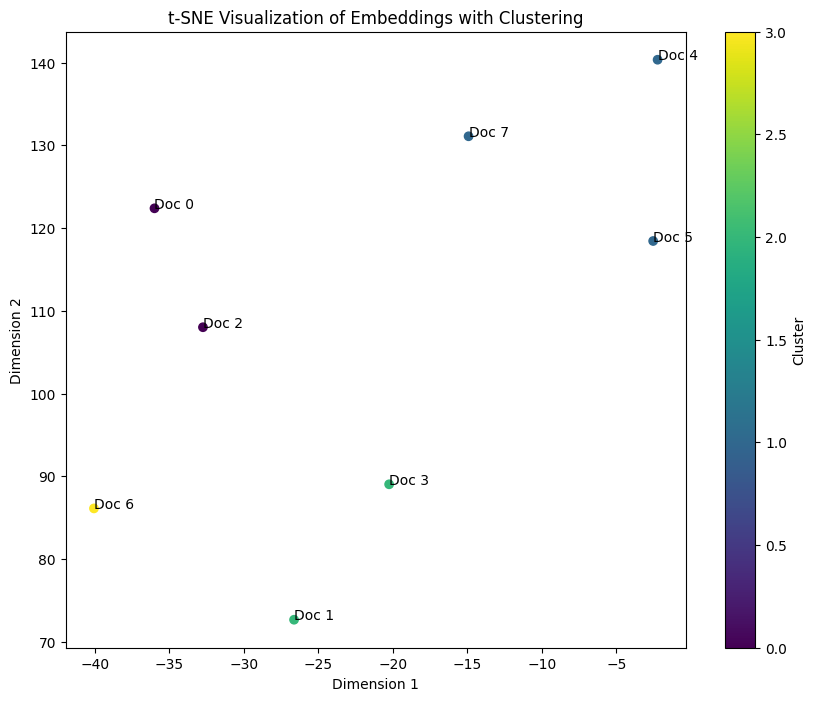

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

def visualize_embeddings_with_tsne_clustering(embeddings, labels=None, n_clusters=3, perplexity=2):
    # Konvertiere die Liste der Embeddings in ein Numpy-Array
    embeddings_array = np.array(embeddings)
    
    # Führe das Clustering durch
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(embeddings_array)
    
    # Reduziere die Dimensionen mit t-SNE
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
    reduced_embeddings = tsne.fit_transform(embeddings_array)
    
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=cluster_labels, cmap='viridis', label='Documents')
    
    if labels:
        for i, label in enumerate(labels):
            plt.annotate(label, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))
    
    plt.title("t-SNE Visualization of Embeddings with Clustering")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.colorbar(scatter, label='Cluster')
    plt.show()

# Beispielnutzung:
labels = [f"Doc {i}" for i in range(len(embeddings))]
visualize_embeddings_with_tsne_clustering(embeddings, labels=labels, n_clusters=4, perplexity=5)